<a href="https://colab.research.google.com/github/AbhayKhamkar/Machine_learning-/blob/main/ML_Regressor_project(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Crop Yield Prediction

Aim: Predict the Production in tons & Yield ton/hec

Dataset: Crop production dataset https://www.kaggle.com/datasets/sriharikatare/indian-crop-production

In [ ]:
#required libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# Crop Production DataSet
df=pd.read_csv("/content/Crop_production[1].csv")
df

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99844,99844,west bengal,rabi,wheat,60,30,30,6.70,152.54,22.280000,2013.0,5152.0,2.559364
99845,99845,west bengal,summer,maize,80,40,20,5.68,182.50,29.200000,258.0,391.0,1.515504
99846,99846,west bengal,summer,rice,80,40,40,5.64,182.50,29.200000,105.0,281.0,2.676190
99847,99847,west bengal,rabi,rice,80,40,40,5.42,152.54,22.280000,152676.0,261435.0,1.712352


Data cleaning & visualization

In [ ]:
#droping unwanted column and NaN value
df.drop(columns=['Unnamed: 0'],axis = 0, inplace = True)
df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


In [ ]:
def get_null_info(dataframe):
    null_vals = dataframe.isnull().sum()

    df_null_vals = pd.concat({'Null Count': null_vals,
                              'Percent Missing (%)': round(null_vals * 100 / len(dataframe), 2)}, axis=1)

    return df_null_vals.sort_values(by=['Null Count'], ascending=False)

In [ ]:
get_null_info(df)

,Null Count,Percent Missing (%)
State_Name,0,0.0
Crop_Type,0,0.0
Crop,0,0.0
N,0,0.0
P,0,0.0
K,0,0.0
pH,0,0.0
rainfall,0,0.0
temperature,0,0.0
Area_in_hectares,0,0.0


<Axes: xlabel='State_Name', ylabel='count'>

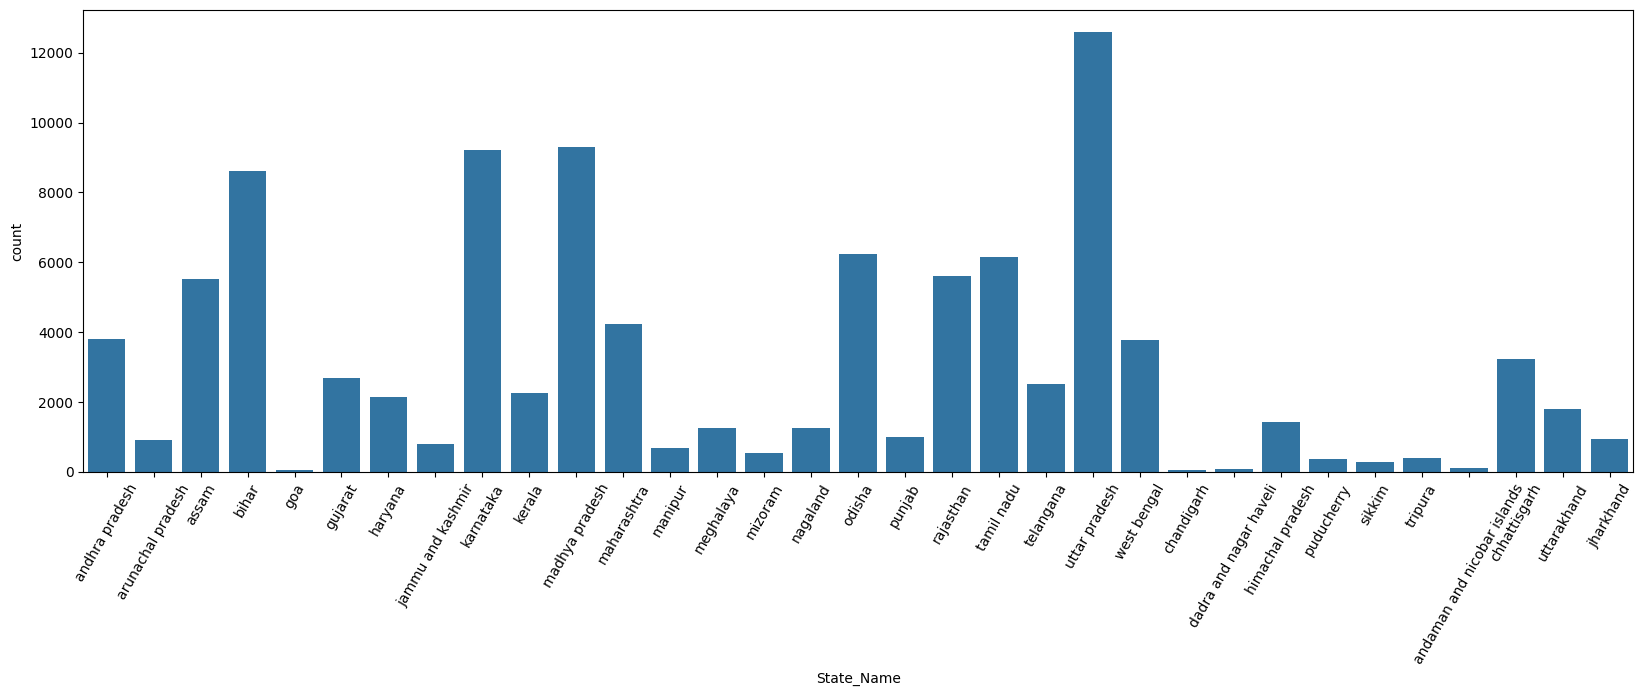

In [ ]:
# state value count
plt.figure(figsize=(20,6))
plt.xticks(rotation=60)
sns.countplot(x='State_Name',data=df)

In [ ]:
State_count=df['State_Name'].value_counts()

In [ ]:
# In this step we drop that state which have count below 100.
State_Name_to_drop = State_count[State_count < 100].index.tolist()
df_filtered = df[~df['State_Name'].isin(State_Name_to_drop)]
df = df_filtered.reset_index(drop=True)

In [ ]:
df['Crop'].value_counts()

rice           11376
maize           9839
moong           6853
sesamum         6287
wheat           6204
rapeseed        5404
jowar           5358
potato          5312
onion           5152
sunflower       3679
cotton          3157
barley          3139
ragi            2967
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2401
soyabean        2325
coriander       2252
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       724
blackpepper      563
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28
ashgourd          28
pomegranate  

<Axes: xlabel='Crop', ylabel='count'>

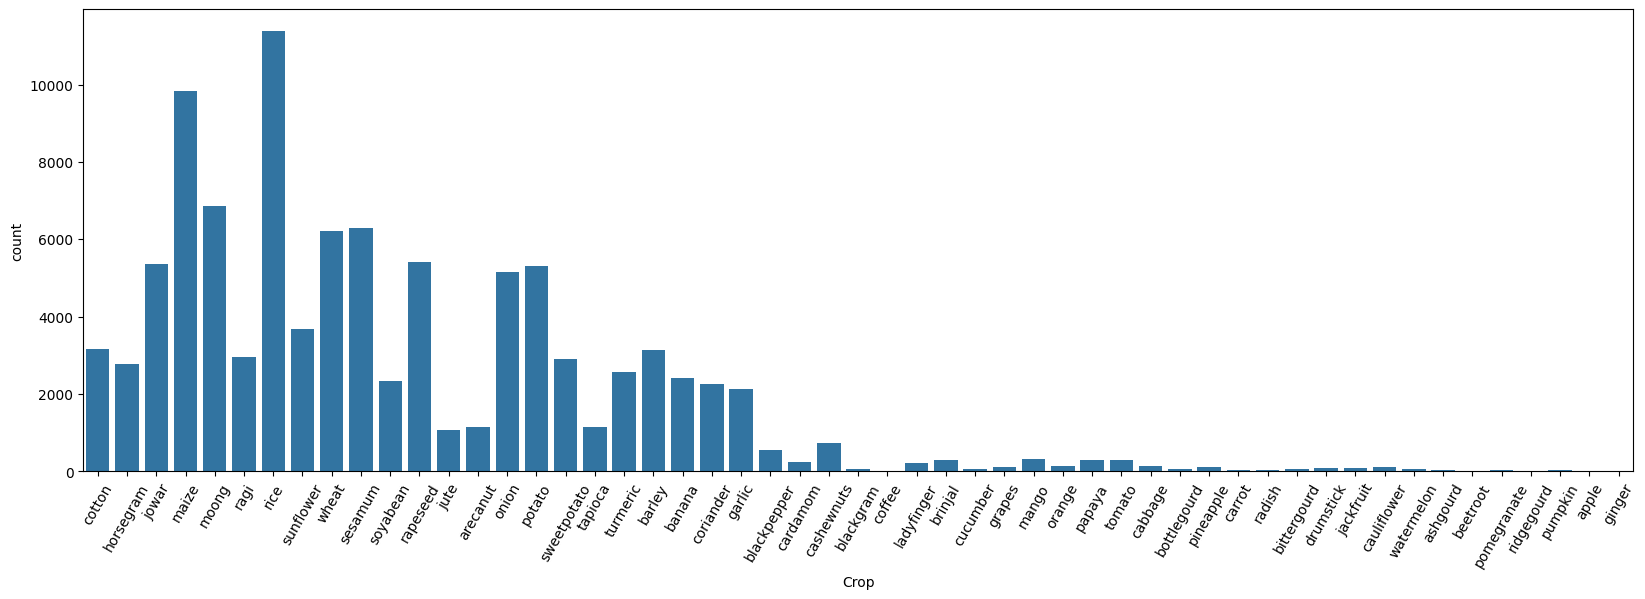

In [ ]:
# state crop count

plt.figure(figsize=(20,6))
plt.xticks(rotation=60)
sns.countplot(x='Crop',data=df)

In [ ]:
df.head()

,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


<Axes: xlabel='Crop'>

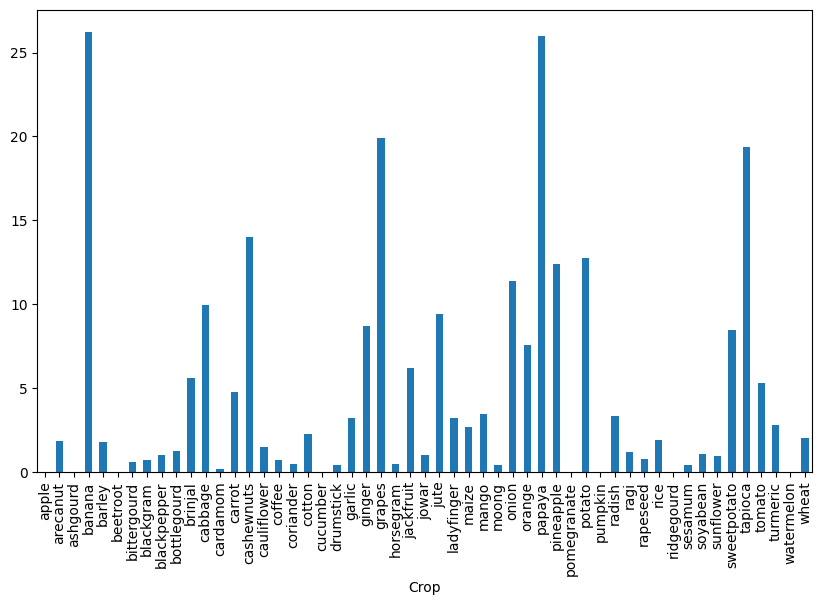

In [ ]:
# title Average Yield by Crop
plt.figure(figsize=(10,6))
df.groupby('Crop')['Yield_ton_per_hec'].mean().plot.bar()

<Axes: xlabel='State_Name'>

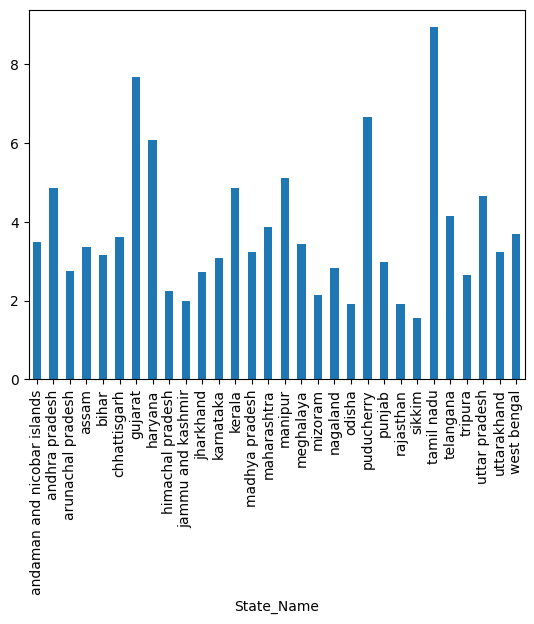

In [ ]:
# title Average Yield by State

df.groupby('State_Name')['Yield_ton_per_hec'].mean().plot(kind='bar')

Data Pre-processing

In [ ]:
#creating copy of orignal dataset
datacorr=df.copy()

In [ ]:
# Converting textual data into numeric by using LabelEncodeing

categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

In [ ]:
# Removing outlier by using IQR
# Calculate the IQR for each feature

Q1 = datacorr.quantile(0.35)
Q3 = datacorr.quantile(0.95)
IQR = Q3 - Q1

# Identify potential outliers using the IQR
lower_bound = Q1 - 3.0 * IQR
upper_bound = Q3 + 3.0 * IQR

# Filter out outliers
datacorr_no_outliers = datacorr[(datacorr >= lower_bound) & (datacorr <= upper_bound)].dropna()

In [ ]:
X=datacorr_no_outliers[["Crop","N","P","K","rainfall","temperature","Area_in_hectares"]]
y=datacorr_no_outliers[["Production_in_tons","Yield_ton_per_hec"]]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [ ]:
# Reducing dimensional by using Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y)

In [ ]:
X.shape

(98837, 7)

In [ ]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge(random_state=42)
Ridge_model.fit(X_train, y_train)

Ridge(random_state=42)

In [ ]:
Ridge_model.score(X_train, y_train), Ridge_model.score(X_test, y_test)

(0.4742803430219681, 0.4693934252883978)

In [ ]:
y_pred = Ridge_model.predict(X_test)

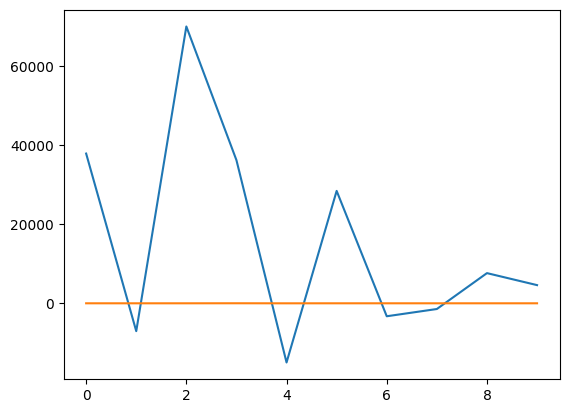

In [ ]:
plt.plot( y_pred[:10]);

Building Model

The accuracy of the Linear Regression Model Train is 47.43
The accuracy of the  Linear Regression Model Test is 46.94


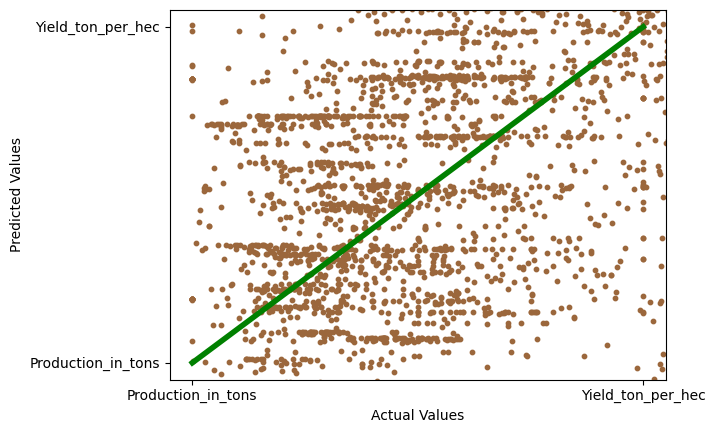

The accuracy of the Random Forest Model Train is 97.68
The accuracy of the  Random Forest Model Test is 88.44


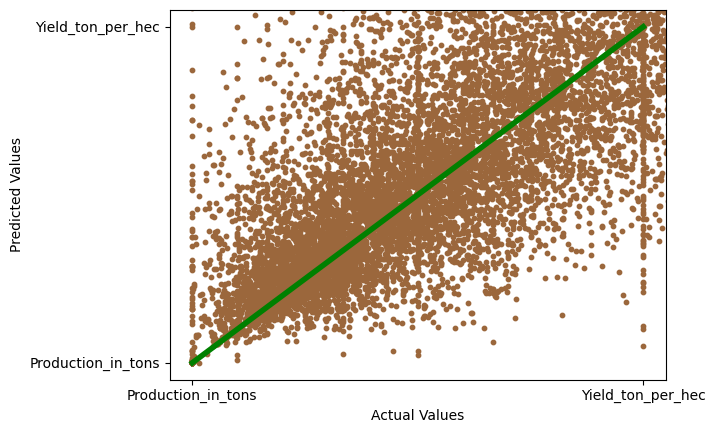

The accuracy of the XGBoost Model Train is 92.92
The accuracy of the  XGBoost Model Test is 90.34


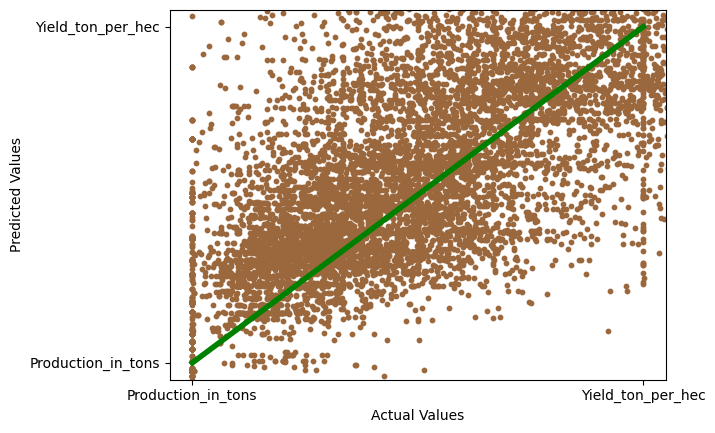

The accuracy of the KNN Model Train is 92.86
The accuracy of the  KNN Model Test is 90.08


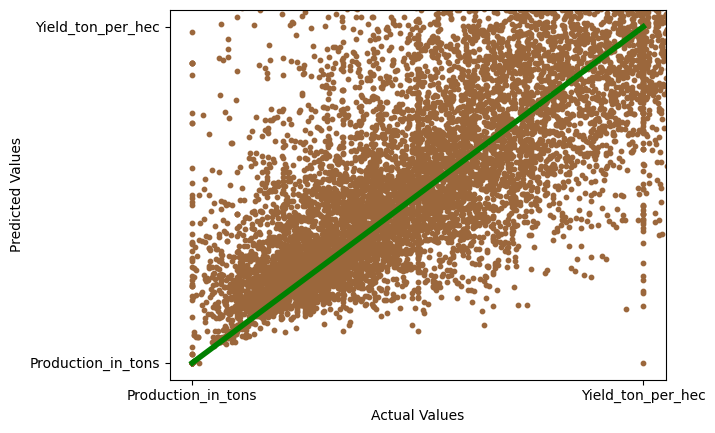

The accuracy of the Decision Tree Model Train is 93.20
The accuracy of the  Decision Tree Model Test is 87.01


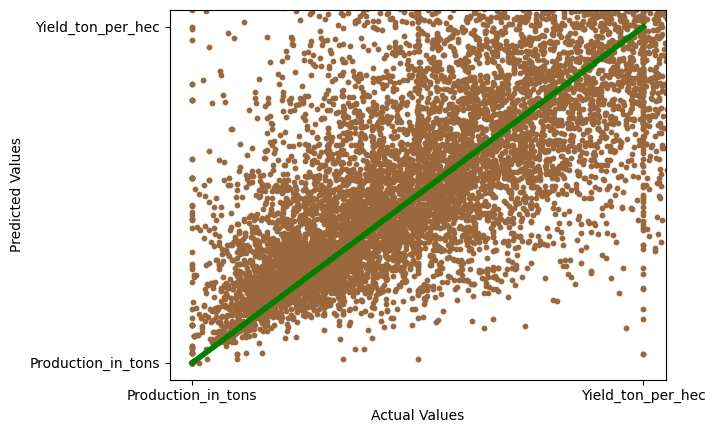

,Model,MSE,R2_score_train,R2_score_test,RMSE
0,Linear Regression,1395487666.123186,0.474280,0.469393,37356.226604
1,Random Forest,324146818.390477,0.976823,0.884375,18004.077827
2,XGBoost,295191760.309514,0.929177,0.903386,17181.145489
3,KNN,292059910.863759,0.928610,0.900838,17089.760410
4,Decision Tree,381388776.800185,0.931972,0.870110,19529.177576


In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression(n_jobs=1)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(learning_rate= 0.2, max_depth = 5, n_estimators=300,random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=7, p=2, weights= 'uniform')),
    ('Decision Tree',DecisionTreeRegressor(max_depth= None, min_samples_leaf= 4, min_samples_split= 10,random_state=42)),
    ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_tain = model.predict(X_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score_train = r2_score(y_train, y_pred_tain)
    R2_score_test = r2_score(y_test, y_pred)
    RMSE=math.sqrt(MSE)
    results.append((name, MSE, R2_score_train, R2_score_test, RMSE))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'MSE', 'R2_score_train','R2_score_test', 'RMSE'])
df_styled_best = dff.style.highlight_max(subset=['R2_score_train','R2_score_test'], color='green').highlight_min(subset=['MSE','RMSE'], color='green').highlight_max(subset=['MSE','RMSE'], color='red').highlight_min(subset=['R2_score_train','R2_score_test'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)

In [ ]:
from sklearn.model_selection import GridSearchCV
param={
    'n_jobs':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
}
grid_LR = GridSearchCV(LinearRegression(),param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_LR.fit(X_train, y_train)
grid_LR.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

{'n_jobs': 1}

In [ ]:
# Define scoring metric
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Define parameter grid for DecisionTreeRegressor
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define parameter grid for KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Define parameter grid for XGBRegressor
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Create GridSearchCV objects for each regressor
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid_dt, scoring=scoring, cv=5, verbose=2, n_jobs=-1)
grid_search_knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid_knn, scoring=scoring, cv=5, verbose=2, n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid_xgb, scoring=scoring, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV objects to the training data
grid_search_dt.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score for each regressor
best_params_dt = grid_search_dt.best_params_

best_params_knn = grid_search_knn.best_params_

best_params_xgb = grid_search_xgb.best_params_


# Print the results
print("DecisionTreeRegressor Best Parameters:", best_params_dt)

print("KNeighborsRegressor Best Parameters:", best_params_knn)

print("XGBRegressor Best Parameters:", best_params_xgb)



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
DecisionTreeRegressor Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
DecisionTreeRegressor Best Mean Squared Error: -411396118.49598086
DecisionTreeRegressor Mean Squared Error on Test Set: 383696679.483205
KNeighborsRegressor Best Parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
KNeighborsRegressor Best Mean Squared Error: -305164229.45768464
KNeighborsRegressor Mean Squared Error on Test Set: 295757095.4095577
XGBRegressor Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
XGBRegressor Best Mean Squared Error: -321604391.04873496
XGBRegressor Mean Squared Error on Test Set: 295191760.3095144


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import pandas as pd

# Load the dataset
# Assuming you have your dataset loaded into X_train, X_test, y_train, y_test
# Replace this with your actual dataset loading code
# X_train, X_test, y_train, y_test = ...

# Define the RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

# Define the scoring metric
scoring = make_scorer(mean_squared_error)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring=scoring, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_

# Print the results
print("Best Parameters:", best_params)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
